In [35]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from random import random, randrange, choice, shuffle, randint
from datetime import datetime, timedelta, date
from itertools import combinations
from pprint import pprint
import calendar
import plotly.express as px
import time

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # CellÏùò Î™®Îì† Î∞òÌôòÍ∞í Ï∂úÎ†•

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [36]:
data_num = "_real3"
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞ = pd.read_excel(f"D:/Í≥µÏ†ïÏµúÏ†ÅÌôî/data/data{data_num}.xlsx", sheet_name="Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞")
Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞ = pd.read_excel(f"D:/Í≥µÏ†ïÏµúÏ†ÅÌôî/data/data{data_num}.xlsx", sheet_name="Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞")
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.shape, Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞.shape

ÏÉòÌîåÍ∞úÏàò = 30
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.iloc[:ÏÉòÌîåÍ∞úÏàò,:]
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.shape, Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞.shape

((188, 18), (6, 7))

((30, 18), (6, 7))

In [37]:
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.head()

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ  Ï§ëÎüâ    Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
0       1  ÌôïÏ†ï  836506  E42S  DK1    41  76  763.7  13.0  13.5 2024-02-19   
1       2  ÌôïÏ†ï  422406  N22P   SS    45  10  635.9  14.4  10.5 2024-02-26   
2       3  ÌôïÏ†ï  426506  B16P   TT    41  44  472.1  15.0   7.5 2024-02-29   
3       4  ÌôïÏ†ï  426506  B16S   TT    41  41  416.8  15.0   7.5 2024-02-29   
4       5  ÌôïÏ†ï  836506  D61P   UA    41  32  371.0  13.2  16.3 2024-02-27   

       Ï§ë_ÏôÑÎ£åÏùº  ÌëúÏ§ÄÍ≥µÍ∏∞ Ï†ïÎ∞òÎ™Ö      Ïã§_Ï∞©ÏàòÏùº      Ïã§_ÏôÑÎ£åÏùº  Ïã§_Í≥µÍ∏∞  Ï¢åÏÉÅÎã®Ï¢åÌëú  
0 2024-02-29    10  D1 2024-02-22 2024-03-06    13    NaN  
1 2024-03-05     8  C1 2024-02-23 2024-03-05    11    NaN  
2 2024-03-22    22  D1 2024-02-23 2024-03-12    18    NaN  
3 2024-03-22    22  D2 2024-02-23 2024-03-19    25    NaN  
4 2024-03-12    14  E1 2024-02-23 2024-03-11    17    NaN

# Ìï®Ïàò Ï†ïÏùò

## Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ 1Ï∞® Ï†ÑÏ≤òÎ¶¨

In [38]:
import functools
def unpack_df_columns(func):
    @functools.wraps(func)
    def _unpack_df_columns(*args, **kwargs):
        series = args[0]
        return func(*series.values)
    return _unpack_df_columns

@unpack_df_columns
def Î∏îÎ°ùÏö∞ÏÑ†ÏàúÏúÑÍµ¨ÌïòÍ∏∞(ÎÇ†ÏßúÏàúÏÑú, Í≥µÍ∏∞ÏàúÏÑú, ÌÅ¨Í∏∞ÏàúÏÑú):
    global Ï∞©ÏàòÏùºÍ∞ÄÏ§ëÏπò, Í≥µÍ∏∞Í∞ÄÏ§ëÏπò, ÌÅ¨Í∏∞Í∞ÄÏ§ëÏπò
    result = np.round((ÎÇ†ÏßúÏàúÏÑú*float(Ï∞©ÏàòÏùºÍ∞ÄÏ§ëÏπò) + Í≥µÍ∏∞ÏàúÏÑú*float(Í≥µÍ∏∞Í∞ÄÏ§ëÏπò) + ÌÅ¨Í∏∞ÏàúÏÑú*float(ÌÅ¨Í∏∞Í∞ÄÏ§ëÏπò))/3,1)
    return result

@unpack_df_columns
def Î∏îÎ°ùÏÇ¨Ïù¥Ï¶àÌäúÌîåÎßåÎì§Í∏∞(Í∞ÄÎ°ú, ÏÑ∏Î°ú):
    Í∏∏Ïù¥2 = max(Í∞ÄÎ°ú, ÏÑ∏Î°ú)  
    Í∏∏Ïù¥1 = min(Í∞ÄÎ°ú, ÏÑ∏Î°ú)
    result = (Í∏∏Ïù¥2, Í∏∏Ïù¥1)
    return result

def Î∏îÎ°ùÏ¢ÖÎ•òÍµ¨ÌïòÍ∏∞(Ïä§ÌÖåÏù¥ÏßÄ):
    if Ïä§ÌÖåÏù¥ÏßÄ in [41, 42]:
        return "ÎåÄÏ°∞Î¶Ω"
    else:
        return "Ï§ëÏ°∞Î¶Ω"

def Î∏îÎ°ùÌÉÄÏûÖÍµ¨ÌïòÍ∏∞(Î∏îÎ°ù):
    return Î∏îÎ°ù[-1:]

@unpack_df_columns
def get_pair_id(Î∏îÎ°ùÏ¢ÖÎ•ò, Ìò∏ÏÑ†Î≤àÌò∏, Î∏îÎ°ù):
    result = str(Î∏îÎ°ùÏ¢ÖÎ•ò)+str(Ìò∏ÏÑ†Î≤àÌò∏)+Î∏îÎ°ù[:-1]
    return result

@unpack_df_columns
def Í≥ÑÌöçÍ≥µÍ∏∞Íµ¨ÌïòÍ∏∞(Î∏îÎ°ùÏ¢ÖÎ•ò, ÌëúÏ§ÄÍ≥µÍ∏∞):
    if Î∏îÎ°ùÏ¢ÖÎ•ò == "ÎåÄÏ°∞Î¶Ω":
        return min(7, ÌëúÏ§ÄÍ≥µÍ∏∞)
    else:
        return min(6, ÌëúÏ§ÄÍ≥µÍ∏∞)

def Î∞òÏ∂úÏùºÍµ¨ÌïòÍ∏∞(Ï§ë_ÏôÑÎ£åÏùº):
    return pd.to_datetime(Ï§ë_ÏôÑÎ£åÏùº) - timedelta(days=int(3))

@unpack_df_columns
def ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨ÏùºÍµ¨ÌïòÍ∏∞(ÎÇ©Í∏∞, Í≥µÍ∏∞):
    result = pd.to_datetime(ÎÇ©Í∏∞) - timedelta(days=int(Í≥µÍ∏∞))
    return result.date()

# def ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùºÍµ¨ÌïòÍ∏∞(ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº):
#     global Ï°∞Í∏∞Ï∞©ÏàòÌïúÍ≥ÑÏùºÏàò
#     return pd.to_datetime(ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº) - timedelta(days=int(Ï°∞Í∏∞Ï∞©ÏàòÌïúÍ≥ÑÏùºÏàò))

def ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùºÍµ¨ÌïòÍ∏∞(Ï§ë_Ï∞©ÏàòÏùº):
    global Ï°∞Í∏∞Ï∞©ÏàòÌïúÍ≥ÑÏùºÏàò
    return pd.to_datetime(Ï§ë_Ï∞©ÏàòÏùº) - timedelta(days=int(Ï°∞Í∏∞Ï∞©ÏàòÌïúÍ≥ÑÏùºÏàò))
    
@unpack_df_columns
def E32CÏÑ∏Î°úÍ∏∏Ïù¥Ï°∞Ï†ïÌïòÍ∏∞(Î∏îÎ°ù, ÏÑ∏Î°ú):   # E32C Î∏îÎ°ùÏùÄ ÏïàÏ†ÑÌÜµÎ°ú ÏùºÎ∂Ä Ïπ®Î≤îÌïòÏó¨ ÏÑ∏Î°ú Î∞∞ÏπòÍ∞ÄÎä•Ìïú Ï†ê Í≥†Î†§
    if Î∏îÎ°ù == "E32C":
        return ÏÑ∏Î°ú - 2
    else:
        return ÏÑ∏Î°ú
    
def Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞):
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.copy()
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Î∏îÎ°ùÏ¢ÖÎ•ò"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ïä§ÌÖåÏù¥ÏßÄ"].apply(Î∏îÎ°ùÏ¢ÖÎ•òÍµ¨ÌïòÍ∏∞)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÌÉÄÏûÖ"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Î∏îÎ°ù"].apply(Î∏îÎ°ùÌÉÄÏûÖÍµ¨ÌïòÍ∏∞)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_ID"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∏îÎ°ùÏ¢ÖÎ•ò","Ìò∏ÏÑ†Î≤àÌò∏", "Î∏îÎ°ù"]].apply(get_pair_id, axis=1)
    
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Í∞ÄÎ°ú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Í∞ÄÎ°ú"].apply(lambda x: np.round(x,0))
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÑ∏Î°ú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÑ∏Î°ú"].apply(lambda x: np.round(x,0))
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÑ∏Î°ú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∏îÎ°ù", "ÏÑ∏Î°ú"]].apply(E32CÏÑ∏Î°úÍ∏∏Ïù¥Ï°∞Ï†ïÌïòÍ∏∞, axis=1)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÇ¨Ïù¥Ï¶à"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Í∞ÄÎ°ú", "ÏÑ∏Î°ú"]].apply(Î∏îÎ°ùÏÇ¨Ïù¥Ï¶àÌäúÌîåÎßåÎì§Í∏∞, axis=1)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Î©¥Ï†Å"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.eval("Í∞ÄÎ°ú*ÏÑ∏Î°ú")
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏµúÎåÄÍ∏∏Ïù¥"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÇ¨Ïù¥Ï¶à"].apply(lambda x: max(x))
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏµúÏÜåÍ∏∏Ïù¥"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÇ¨Ïù¥Ï¶à"].apply(lambda x: min(x))
    
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ï§ë_ÏôÑÎ£åÏùº"] = pd.to_datetime(Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ï§ë_ÏôÑÎ£åÏùº"])
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Í≥ÑÌöçÍ≥µÍ∏∞"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∏îÎ°ùÏ¢ÖÎ•ò", "ÌëúÏ§ÄÍ≥µÍ∏∞"]].apply(Í≥ÑÌöçÍ≥µÍ∏∞Íµ¨ÌïòÍ∏∞, axis=1)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Î∞òÏ∂úÏùº"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ï§ë_ÏôÑÎ£åÏùº"].apply(Î∞òÏ∂úÏùºÍµ¨ÌïòÍ∏∞)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∞òÏ∂úÏùº", "Í≥ÑÌöçÍ≥µÍ∏∞"]].apply(ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨ÏùºÍµ¨ÌïòÍ∏∞, axis=1)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ï§ë_Ï∞©ÏàòÏùº"].apply(ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùºÍµ¨ÌïòÍ∏∞)
    
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÎÇ†ÏßúÏàúÏÑú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº"].rank()
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Í≥µÍ∏∞ÏàúÏÑú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÌëúÏ§ÄÍ≥µÍ∏∞"].rank(ascending=False)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÌÅ¨Í∏∞ÏàúÏÑú"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Î©¥Ï†Å"].rank(ascending=False)
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["Ïö∞ÏÑ†ÏàúÏúÑ"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["ÎÇ†ÏßúÏàúÏÑú", "Í≥µÍ∏∞ÏàúÏÑú", "ÌÅ¨Í∏∞ÏàúÏÑú"]].apply(Î∏îÎ°ùÏö∞ÏÑ†ÏàúÏúÑÍµ¨ÌïòÍ∏∞, axis=1)
    
    Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.sort_values(by=["Ïö∞ÏÑ†ÏàúÏúÑ"])
    return Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞

In [39]:
Ï∞©ÏàòÏùºÍ∞ÄÏ§ëÏπò, Í≥µÍ∏∞Í∞ÄÏ§ëÏπò, ÌÅ¨Í∏∞Í∞ÄÏ§ëÏπò = 9, 0.5, 0.5
Ï°∞Í∏∞Ï∞©ÏàòÌïúÍ≥ÑÏùºÏàò = 9

Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞)
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.head()

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ  Ï§ëÎüâ    Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
9       10  ÌôïÏ†ï  836506  E42P  DK1    41  68  684.5  13.0  15.0 2024-02-19   
0        1  ÌôïÏ†ï  836506  E42S  DK1    41  76  763.7  13.0  14.0 2024-02-19   
10      11  ÌôïÏ†ï  836506  E51P   DK    41  91  962.7  13.0  15.0 2024-02-19   
1        2  ÌôïÏ†ï  422406  N22P   SS    45  10  635.9  14.0  10.0 2024-02-26   
8        9  ÌôïÏ†ï  422406  N22S   SS    45  10  639.2  14.0  10.0 2024-02-26   

        Ï§ë_ÏôÑÎ£åÏùº  ÌëúÏ§ÄÍ≥µÍ∏∞ Ï†ïÎ∞òÎ™Ö      Ïã§_Ï∞©ÏàòÏùº      Ïã§_ÏôÑÎ£åÏùº  Ïã§_Í≥µÍ∏∞  Ï¢åÏÉÅÎã®Ï¢åÌëú Î∏îÎ°ùÏ¢ÖÎ•ò ÌÉÄÏûÖ  \
9  2024-02-29    10  D2 2024-02-26 2024-03-06     9    NaN  ÎåÄÏ°∞Î¶Ω  P   
0  2024-02-29    10  D1 2024-02-22 2024-03-06    13    NaN  ÎåÄÏ°∞Î¶Ω  S   
10 2024-03-07    17  E1 2024-02-26 2024-03-08    11    NaN  ÎåÄÏ°∞Î¶Ω  P   
1  2024-03-05     8  C1 2024-02-23 2024-03-05    11    NaN  Ï§ëÏ°∞Î¶Ω  P   
8  2024-03-05     8  C1 2024-02-26 2024-03-08    11    NaN  Ï§ëÏ°∞Î¶Ω  S   

         PAIR_ID           ÏÇ¨Ïù¥Ï¶à     Î©¥Ï†Å  ÏµúÎåÄÍ∏∏Ïù¥  ÏµúÏÜåÍ∏∏Ïù¥  Í≥ÑÌöçÍ≥µÍ∏∞        Î∞òÏ∂úÏùº  \
9   ÎåÄÏ°∞Î¶Ω836506E42  (15.0, 13.0)  195.0  15.0  13.0     7 2024-02-26   
0   ÎåÄÏ°∞Î¶Ω836506E42  (14.0, 13.0)  182.0  14.0  13.0     7 2024-02-26   
10  ÎåÄÏ°∞Î¶Ω836506E51  (15.0, 13.0)  195.0  15.0  13.0     7 2024-03-04   
1   Ï§ëÏ°∞Î¶Ω422406N22  (14.0, 10.0)  140.0  14.0  10.0     6 2024-03-02   
8   Ï§ëÏ°∞Î¶Ω422406N22  (14.0, 10.0)  140.0  14.0  10.0     6 2024-03-02   

       ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº    ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº  ÎÇ†ÏßúÏàúÏÑú  Í≥µÍ∏∞ÏàúÏÑú  ÌÅ¨Í∏∞ÏàúÏÑú  Ïö∞ÏÑ†ÏàúÏúÑ  
9   2024-02-19 2024-02-10   1.5  21.5   9.0   9.6  
0   2024-02-19 2024-02-10   1.5  21.5  14.0  10.4  
10  2024-02-26 2024-02-10   5.0   8.0   9.0  17.8  
1   2024-02-25 2024-02-17   3.5  25.0  20.0  18.0  
8   2024-02-25 2024-02-17   3.5  25.0  20.0  18.0

## Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ 2Ï∞® Ï†ÑÏ≤òÎ¶¨

In [40]:
def get_pair_count(SP_PAIR):
    global Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞
    result = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_ID"].value_counts()[SP_PAIR]
    return result
    
@unpack_df_columns
def pair_target(Î∏îÎ°ùÏ¢ÖÎ•ò, Î∏îÎ°ùÌÉÄÏûÖ, PAIR_CNT):
    if Î∏îÎ°ùÏ¢ÖÎ•ò == "ÎåÄÏ°∞Î¶Ω" and Î∏îÎ°ùÌÉÄÏûÖ in ["P", "S"] and PAIR_CNT == 2:
        return "PAIR"
    else:
        return "SINGLE"

In [41]:
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_CNT"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_ID"].apply(get_pair_count)
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_TARGET"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∏îÎ°ùÏ¢ÖÎ•ò", "ÌÉÄÏûÖ", "PAIR_CNT"]].apply(pair_target, axis=1)
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.iloc[:,:]

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ   Ï§ëÎüâ     Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
9       10  ÌôïÏ†ï  836506  E42P  DK1    41   68   684.5  13.0  15.0 2024-02-19   
0        1  ÌôïÏ†ï  836506  E42S  DK1    41   76   763.7  13.0  14.0 2024-02-19   
10      11  ÌôïÏ†ï  836506  E51P   DK    41   91   962.7  13.0  15.0 2024-02-19   
1        2  ÌôïÏ†ï  422406  N22P   SS    45   10   635.9  14.0  10.0 2024-02-26   
8        9  ÌôïÏ†ï  422406  N22S   SS    45   10   639.2  14.0  10.0 2024-02-26   
4        5  ÌôïÏ†ï  836506  D61P   UA    41   32   371.0  13.0  16.0 2024-02-27   
5        6  ÌôïÏ†ï  836506  D61S   UA    41   33   437.5  13.0  16.0 2024-02-28   
22      23  ÎØ∏Ï†ï  838206  B21S  TT1    43   20   401.9  10.0   8.0 2024-03-06   
28      29  ÎØ∏Ï†ï  838206  B21P  TT1    43   40   405.2  10.0   8.0 2024-03-06   
29      30  ÎØ∏Ï†ï  838206  B21P  TT2    48   12   241.1  10.0   3.0 2024-03-06   
16      17  ÎØ∏Ï†ï  838206  D24C   UA    41   10   217.5   8.0  11.0 2024-02-29   
24      25  ÎØ∏Ï†ï  426506  E32C   DK    41   83  1061.2  15.0  25.0 2024-02-28   
14      15  ÎØ∏Ï†ï  422706  B31S   SS    42   74   818.9  16.0  12.0 2024-02-27   
23      24  ÎØ∏Ï†ï  422706  B31P   SS    42   74   818.9  16.0  12.0 2024-02-27   
17      18  ÎØ∏Ï†ï  422406  E32P  SS1    45   34   867.5  18.0  14.0 2024-03-06   
18      19  ÎØ∏Ï†ï  422406  E32S  SS1    45   34   857.1  18.0  14.0 2024-03-06   
20      21  ÎØ∏Ï†ï  836506  S17S   SS    41  131  1031.7  15.0  14.0 2024-02-27   
25      26  ÎØ∏Ï†ï  836506  A11S   DK    41   33   398.2  15.0  19.0 2024-03-04   
15      16  ÎØ∏Ï†ï  422706  S19S   SS    42   27   345.4  13.0   9.0 2024-03-07   
21      22  ÎØ∏Ï†ï  422706  S19P   SS    42   28   348.0  13.0   9.0 2024-03-07   
13      14  ÎØ∏Ï†ï  426706  E33C   DK    41   95  1223.8  11.0  13.0 2024-03-11   
6        7  ÌôïÏ†ï  836506  S18P   SS    41   89   840.6  13.0  14.0 2024-02-29   
7        8  ÌôïÏ†ï  836506  S18S   SS    41   89   824.7  13.0  14.0 2024-02-29   
27      28  ÎØ∏Ï†ï  426506  B15P   BS    42   54   322.4  15.0  13.0 2024-03-05   
12      13  ÎØ∏Ï†ï  426506  B11S   BS    42   44   250.2  15.0  12.0 2024-03-05   
11      12  ÎØ∏Ï†ï  426506  B11P   BS    42   47   293.5  15.0  12.0 2024-03-05   
2        3  ÌôïÏ†ï  426506  B16P   TT    41   44   472.1  15.0   8.0 2024-02-29   
3        4  ÌôïÏ†ï  426506  B16S   TT    41   41   416.8  15.0   8.0 2024-02-29   
19      20  ÎØ∏Ï†ï  422806  F22C  ST1    41   15   176.6   8.0   8.0 2024-03-07   
26      27  ÎØ∏Ï†ï  422406  N22P   UA    41   72   447.6  14.0  10.0 2024-03-05   

        Ï§ë_ÏôÑÎ£åÏùº  ÌëúÏ§ÄÍ≥µÍ∏∞  Ï†ïÎ∞òÎ™Ö      Ïã§_Ï∞©ÏàòÏùº      Ïã§_ÏôÑÎ£åÏùº  Ïã§_Í≥µÍ∏∞  Ï¢åÏÉÅÎã®Ï¢åÌëú Î∏îÎ°ùÏ¢ÖÎ•ò ÌÉÄÏûÖ  \
9  2024-02-29    10   D2 2024-02-26 2024-03-06     9    NaN  ÎåÄÏ°∞Î¶Ω  P   
0  2024-02-29    10   D1 2024-02-22 2024-03-06    13    NaN  ÎåÄÏ°∞Î¶Ω  S   
10 2024-03-07    17   E1 2024-02-26 2024-03-08    11    NaN  ÎåÄÏ°∞Î¶Ω  P   
1  2024-03-05     8   C1 2024-02-23 2024-03-05    11    NaN  Ï§ëÏ°∞Î¶Ω  P   
8  2024-03-05     8   C1 2024-02-26 2024-03-08    11    NaN  Ï§ëÏ°∞Î¶Ω  S   
4  2024-03-12    14   E1 2024-02-23 2024-03-11    17    NaN  ÎåÄÏ°∞Î¶Ω  P   
5  2024-03-13    14   E2 2024-02-23 2024-03-12    18    NaN  ÎåÄÏ°∞Î¶Ω  S   
22 2024-03-12     6  NaN 2024-03-01 2024-03-08     7    NaN  Ï§ëÏ°∞Î¶Ω  S   
28 2024-03-12     6  NaN 2024-03-05 2024-03-13     8    NaN  Ï§ëÏ°∞Î¶Ω  P   
29 2024-03-12     6  NaN 2024-03-05 2024-03-13     8    NaN  Ï§ëÏ°∞Î¶Ω  P   
16 2024-03-14    14  NaN 2024-02-28 2024-03-12    13    NaN  ÎåÄÏ°∞Î¶Ω  C   
24 2024-03-15    16  NaN 2024-03-04 2024-03-15    11    NaN  ÎåÄÏ°∞Î¶Ω  C   
14 2024-03-15    17  NaN 2024-02-28 2024-03-19    20    NaN  ÎåÄÏ°∞Î¶Ω  S   
23 2024-03-15    17  NaN 2024-03-04 2024-03-18    14    NaN  ÎåÄÏ°∞Î¶Ω  P   
17 2024-03-14     8  NaN 2024-02-29 2024-03-13    13    NaN  Ï§ëÏ°∞Î¶Ω  P   
18 2024-03-14     8  NaN 2024-02-29 2024-03-13    13    NaN  Ï§ëÏ°∞Î¶Ω  S   
20 2024

In [42]:
# Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_CNT"].value_counts()

In [43]:
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_TARGET"]=="PAIR"]

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ  Ï§ëÎüâ    Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
9       10  ÌôïÏ†ï  836506  E42P  DK1    41  68  684.5  13.0  15.0 2024-02-19   
0        1  ÌôïÏ†ï  836506  E42S  DK1    41  76  763.7  13.0  14.0 2024-02-19   
4        5  ÌôïÏ†ï  836506  D61P   UA    41  32  371.0  13.0  16.0 2024-02-27   
5        6  ÌôïÏ†ï  836506  D61S   UA    41  33  437.5  13.0  16.0 2024-02-28   
14      15  ÎØ∏Ï†ï  422706  B31S   SS    42  74  818.9  16.0  12.0 2024-02-27   
23      24  ÎØ∏Ï†ï  422706  B31P   SS    42  74  818.9  16.0  12.0 2024-02-27   
15      16  ÎØ∏Ï†ï  422706  S19S   SS    42  27  345.4  13.0   9.0 2024-03-07   
21      22  ÎØ∏Ï†ï  422706  S19P   SS    42  28  348.0  13.0   9.0 2024-03-07   
6        7  ÌôïÏ†ï  836506  S18P   SS    41  89  840.6  13.0  14.0 2024-02-29   
7        8  ÌôïÏ†ï  836506  S18S   SS    41  89  824.7  13.0  14.0 2024-02-29   
12      13  ÎØ∏Ï†ï  426506  B11S   BS    42  44  250.2  15.0  12.0 2024-03-05   
11      12  ÎØ∏Ï†ï  426506  B11P   BS    42  47  293.5  15.0  12.0 2024-03-05   
2        3  ÌôïÏ†ï  426506  B16P   TT    41  44  472.1  15.0   8.0 2024-02-29   
3        4  ÌôïÏ†ï  426506  B16S   TT    41  41  416.8  15.0   8.0 2024-02-29   

        Ï§ë_ÏôÑÎ£åÏùº  ÌëúÏ§ÄÍ≥µÍ∏∞  Ï†ïÎ∞òÎ™Ö      Ïã§_Ï∞©ÏàòÏùº      Ïã§_ÏôÑÎ£åÏùº  Ïã§_Í≥µÍ∏∞  Ï¢åÏÉÅÎã®Ï¢åÌëú Î∏îÎ°ùÏ¢ÖÎ•ò ÌÉÄÏûÖ  \
9  2024-02-29    10   D2 2024-02-26 2024-03-06     9    NaN  ÎåÄÏ°∞Î¶Ω  P   
0  2024-02-29    10   D1 2024-02-22 2024-03-06    13    NaN  ÎåÄÏ°∞Î¶Ω  S   
4  2024-03-12    14   E1 2024-02-23 2024-03-11    17    NaN  ÎåÄÏ°∞Î¶Ω  P   
5  2024-03-13    14   E2 2024-02-23 2024-03-12    18    NaN  ÎåÄÏ°∞Î¶Ω  S   
14 2024-03-15    17  NaN 2024-02-28 2024-03-19    20    NaN  ÎåÄÏ°∞Î¶Ω  S   
23 2024-03-15    17  NaN 2024-03-04 2024-03-18    14    NaN  ÎåÄÏ°∞Î¶Ω  P   
15 2024-03-18    11  NaN 2024-02-28 2024-03-14    15    NaN  ÎåÄÏ°∞Î¶Ω  S   
21 2024-03-18    11  NaN 2024-03-01 2024-03-15    14    NaN  ÎåÄÏ°∞Î¶Ω  P   
6  2024-03-20    20   E1 2024-02-23 2024-03-15    21    NaN  ÎåÄÏ°∞Î¶Ω  P   
7  2024-03-20    20   E2 2024-02-23 2024-03-20    26    NaN  ÎåÄÏ°∞Î¶Ω  S   
12 2024-03-20    15  NaN 2024-02-27 2024-03-11    13    NaN  ÎåÄÏ°∞Î¶Ω  S   
11 2024-03-20    15  NaN 2024-02-27 2024-03-13    15    NaN  ÎåÄÏ°∞Î¶Ω  P   
2  2024-03-22    22   D1 2024-02-23 2024-03-12    18    NaN  ÎåÄÏ°∞Î¶Ω  P   
3  2024-03-22    22   D2 2024-02-23 2024-03-19    25    NaN  ÎåÄÏ°∞Î¶Ω  S   

         PAIR_ID           ÏÇ¨Ïù¥Ï¶à     Î©¥Ï†Å  ÏµúÎåÄÍ∏∏Ïù¥  ÏµúÏÜåÍ∏∏Ïù¥  Í≥ÑÌöçÍ≥µÍ∏∞        Î∞òÏ∂úÏùº  \
9   ÎåÄÏ°∞Î¶Ω836506E42  (15.0, 13.0)  195.0  15.0  13.0     7 2024-02-26   
0   ÎåÄÏ°∞Î¶Ω836506E42  (14.0, 13.0)  182.0  14.0  13.0     7 2024-02-26   
4   ÎåÄÏ°∞Î¶Ω836506D61  (16.0, 13.0)  208.0  16.0  13.0     7 2024-03-09   
5   ÎåÄÏ°∞Î¶Ω836506D61  (16.0, 13.0)  208.0  16.0  13.0     7 2024-03-10   
14  ÎåÄÏ°∞Î¶Ω422706B31  (16.0, 12.0)  192.0  16.0  12.0     7 2024-03-12   
23  ÎåÄÏ°∞Î¶Ω422706B31  (16.0, 12.0)  192.0  16.0  12.0     7 2024-03-12   
15  ÎåÄÏ°∞Î¶Ω422706S19   (13.0, 9.0)  117.0  13.0   9.0     7 2024-03-15   
21  ÎåÄÏ°∞Î¶Ω422706S19   (13.0, 9.0)  117.0  13.0   9.0     7 2024-03-15   
6   ÎåÄÏ°∞Î¶Ω836506S18  (14.0, 13.0)  182.0  14.0  13.0     7 2024-03-17   
7   ÎåÄÏ°∞Î¶Ω836506S18  (14.0, 13.0)  182.0  14.0  13.0     7 2024-03-17   
12  ÎåÄÏ°∞Î¶Ω426506B11  (15.0, 12.0)  180.0  15.0  12.0     7 2024-03-17   
11  ÎåÄÏ°∞Î¶Ω426506B11  (15.0, 12.0)  180.0  15.0  12.0     7 2024-03-17   
2   ÎåÄÏ°∞Î¶Ω426506B16   (15.0, 8.0)  120.0  15.0   8.0     7 2024-03-19   
3   ÎåÄÏ°∞Î¶Ω426506B16   (15.0, 8.0)  120.0  15.0   8.0     7 2024-03-19   

       ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº    ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº  ÎÇ†ÏßúÏàúÏÑú  Í≥µÍ∏∞ÏàúÏÑú  ÌÅ¨Í∏∞ÏàúÏÑú  Ïö∞ÏÑ†ÏàúÏúÑ  PAIR_CNT PAIR_TARGET  
9   2024-02-19 2024-02-10   1.5  21.5   9.0   9.6         2        PAIR  
0   2024-02-19 2024-02-10   1.5  21.5  14.0  10.4         2        PAIR  
4   2024-03-02 2024-02-18   6.0  16.5   6.5  21.8         2  

## Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [44]:
@unpack_df_columns
def Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶àÌäúÌîåÎßåÎì§Í∏∞(Í∞ÄÎ°ú, ÏÑ∏Î°ú):
    Í∏∏Ïù¥1 = max(Í∞ÄÎ°ú, ÏÑ∏Î°ú)  
    Í∏∏Ïù¥2 = min(Í∞ÄÎ°ú, ÏÑ∏Î°ú)
    result = (Í∏∏Ïù¥1, Í∏∏Ïù¥2)
    return result

def Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞):
    df = Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞.copy()
    df["ÏÇ¨Ïù¥Ï¶à"] = df[["Í∞ÄÎ°ú", "ÏÑ∏Î°ú"]].apply(Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶àÌäúÌîåÎßåÎì§Í∏∞, axis=1)
    df["ÏµúÎåÄÍ∏∏Ïù¥"] = df["ÏÇ¨Ïù¥Ï¶à"].apply(lambda x: max(x))
    df["ÏµúÏÜåÍ∏∏Ïù¥"] = df["ÏÇ¨Ïù¥Ï¶à"].apply(lambda x: min(x))
    return df

In [45]:
Ï§ëÎüâÍ∞ÄÏ§ëÏπò, ÌÅ¨Í∏∞Í∞ÄÏ§ëÏπò = 0.5, 0.5
Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞ = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞)
Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞

id Ï†ïÎ∞òÍ∑∏Î£π Ï†ïÎ∞òÎ™Ö  Í∞ÄÎä•Ï§ëÎüâ  Í∞ÄÎ°ú  ÏÑ∏Î°ú  Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶à       ÏÇ¨Ïù¥Ï¶à  ÏµúÎåÄÍ∏∏Ïù¥  ÏµúÏÜåÍ∏∏Ïù¥
0   1    C  C1   200  44  13       15  (44, 13)    44    13
1   2    C  C2   200  31  13       15  (31, 13)    31    13
2   3    D  D1   200  43  26       15  (43, 26)    43    26
3   4    D  D2   200  41  26       15  (41, 26)    41    26
4   5    E  E1   200  42  26       20  (42, 26)    42    26
5   6    E  E2   200  41  27       20  (41, 27)    41    27

## Î¨ºÎ¶¨Ï°∞Í±¥ Ï≤¥ÌÅ¨ Ìï®Ïàò (Í∏∏Ïù¥Ï°∞Í±¥)

In [46]:
def Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶àÏ≤¥ÌÅ¨(blk_id):  # Î∏îÎ°ùÏùò ÏµúÏÜåÍ∏∏Ïù¥Í∞Ä Ï†ïÎ∞òÏùò Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶àÎ≥¥Îã§ ÏûëÍ≥†
    Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ = []
    Î∏îÎ°ùÏµúÏÜåÍ∏∏Ïù¥ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏµúÏÜåÍ∏∏Ïù¥"].values[0]
    for Ï†ïÎ∞òÎ™Ö in Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]:
        Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶à = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞[Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]==Ï†ïÎ∞òÎ™Ö]["Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶à"].values[0]
        if Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶à > Î∏îÎ°ùÏµúÏÜåÍ∏∏Ïù¥:
            Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏.append(Ï†ïÎ∞òÎ™Ö)
    return Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏

def Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Ï≤¥ÌÅ¨(blk_id, Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏):  # Î∏îÎ°ùÏùò ÏµúÎåÄÍ∏∏Ïù¥Í∞Ä Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Î≥¥Îã§ ÏûëÍ≥†
    Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ = []
    Î∏îÎ°ùÏµúÎåÄÍ∏∏Ïù¥ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏµúÎåÄÍ∏∏Ïù¥"].values[0]
    for Ï†ïÎ∞òÎ™Ö in Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏:
        Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥ = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞[Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]==Ï†ïÎ∞òÎ™Ö]["ÏµúÎåÄÍ∏∏Ïù¥"].values[0]
        if Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥ >= Î∏îÎ°ùÏµúÎåÄÍ∏∏Ïù¥:
            Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏.append(Ï†ïÎ∞òÎ™Ö)
    return Í∞ÄÎä•Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏

In [47]:
sample_id = 15
Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò = Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶àÏ≤¥ÌÅ¨(sample_id)
print(Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò)
Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò = Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Ï≤¥ÌÅ¨(sample_id, Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò)
print(Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò)

['C1', 'C2', 'D1', 'D2', 'E1', 'E2']
['C1', 'C2', 'D1', 'D2', 'E1', 'E2']


## Î∏îÎ°ùÏ¢ÖÎ•ò Ï≤¥ÌÅ¨ Ìï®Ïàò

In [48]:
def Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨(blk_id, Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏):   # Î∏îÎ°ùÏ¢ÖÎ•òÍ∞Ä Ï§ëÏ°∞Î¶ΩÏù¥Î©¥, EÏ†ïÎ∞ò Î∞∞Ïπò Î∂àÍ∞Ä
    filtered_list = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏.copy()
    Î∏îÎ°ùÏ¢ÖÎ•ò = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Î∏îÎ°ùÏ¢ÖÎ•ò"].values[0]
    Î∏îÎ°ù = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Î∏îÎ°ù"].values[0]
    
    if Î∏îÎ°ùÏ¢ÖÎ•ò == "Ï§ëÏ°∞Î¶Ω" and Î∏îÎ°ù not in ["E32P", "E32S"]:   # Ï§ëÏ°∞Î∏îÎ°ùÏù¥Î©¥, EÍ∑∏Î£π Ï†ïÎ∞ò Ï†úÏô∏. Îã®, E32P E32SÎäî EÍ∑∏Î£π Í∞ÄÎä•
        filtered_list = [item for item in Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ if item not in ('E1', 'E2')]
    elif Î∏îÎ°ùÏ¢ÖÎ•ò == "ÎåÄÏ°∞Î¶Ω":  # ÎåÄÏ°∞Î∏îÎ°ùÏù¥Î©¥ CÍ∑∏Î£π Ï†ïÎ∞ò Ï†úÏô∏
        filtered_list = [item for item in Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ if item not in ('C1', 'C2')]
    return filtered_list

In [49]:
Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò = Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨(sample_id, Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò)
Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò

['D1', 'D2', 'E1', 'E2']

# Î†àÏù¥ÏïÑÏõÉ Î∞∞Ïπò Ìï®Ïàò

In [50]:
def init_jungban(ÏÇ¨Ïù¥Ï¶à):  #ÏÇ¨Ïù¥Ï¶à = (10, 10)
    surface_width, surface_height = ÏÇ¨Ïù¥Ï¶à[0], ÏÇ¨Ïù¥Ï¶à[1]  # Adjusted to match the provided image for demonstration
    surface = np.zeros((surface_height, surface_width), dtype=int)
    return surface, surface_width, surface_height

def can_place_with_thresh(surface, surface_width, surface_height, block_height, block_width, start_row, start_col, thresh):
    new_width = int(surface_width - thresh)
    new_height = int(surface_height - thresh)
    
    if start_row + block_height > surface_height or start_col + block_width > surface_width:
        return False

    block_area = surface[int(start_row):int(start_row+block_height), int(start_col):int(start_col+block_width)]
    if np.any(block_area != 0):
        return False
    
    if start_row > 0 and np.any(surface[int(start_row-thresh): int(start_row),int(start_col):int(start_col+block_width)] != 0):
        return False
    if start_col > 0 and np.any(surface[int(start_row): int(start_row+block_height), int(start_col-thresh): int(start_col)] != 0):
        return False
    
    return True

# Function to place a block on the surface, if possible
def place_block(surface, block_height, block_width, start_row, start_col, block_id):
    block_height, block_width = block_height, block_width
    surface[int(start_row):int(start_row + block_height), int(start_col):int(start_col + block_width)] = block_id
    return surface


def Î†àÏù¥ÏïÑÏõÉÎ∞∞Ïπò(surface, surface_width, surface_height, block_height, block_width, block_id, thresh):
    
    best_fit_score = float('inf')
    best_position = None
    surface_height = int(surface_height)
    block_height = int(block_height)
    loop_num = int(surface_height - block_height + 1)
    
    for start_row in range(loop_num):
        for start_col in range(loop_num):
            if can_place_with_thresh(surface, surface_width, surface_height, block_height, block_width, start_row, start_col, thresh):
                # Calculate a score; here we use the top-left corner (y, x) as the score
                # A lower score means the block is closer to the top-left
                score = start_row + start_col
                if score < best_fit_score:
                    best_fit_score = score
                    best_position = (start_row, start_col)
    
    if best_position:
        surface = place_block(surface, block_height, block_width, *best_position, block_id)
        return True, surface
    else:
        return False, surface

def get_overlapped_surface(*arrays):
    result = arrays[0]
    for arr in arrays[1:]:
        result = np.add(result, arr)
    return result

# ÌäπÏ†ï Í∞íÎßå ÎÇ®Í∏∞Í≥† Îã§ ÏßÄÏö¥ÌõÑÏóê Í∑∏ Í≤∞Í≥ºÎ•º Îã§Ïãú Í∞Å Ìï¥ÎãπÏùº surfaceÏóê ÎçîÌï¥Ï§ÄÎã§...Ï≤úÏû¨ÎÑ§..„Öã
def extract_newblock_layout_only(overlapped_surface, block_id):
    mask = overlapped_surface != block_id
    overlapped_surface[mask] = 0
    newblock_layout = overlapped_surface
    return newblock_layout

In [51]:
# def draw_layout(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞ò, idx):
#     target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]
#     target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò]
#     fig, ax = plt.subplots(figsize=(8, 6))
#     plt.imshow(target_surface, cmap="Blues", interpolation='nearest')
    
#     for i in range(len(target_surface)):
#         for j in range(len(target_surface[0])):
#             plt.text(j, i, f'{target_surface[i, j]}', ha='center', va='center', color='white', fontsize=7)
#     # plt.colorbar()  # Add a color bar to show the mapping of values to colors
#     plt.show()

In [66]:
def draw_layout_6_subplots(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏, idx):
    Ï†ïÎ∞ò1 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[0]
    Ï†ïÎ∞ò2 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[1]
    Ï†ïÎ∞ò3 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[2]
    Ï†ïÎ∞ò4 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[3]
    Ï†ïÎ∞ò5 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[4]
    Ï†ïÎ∞ò6 = Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏[5]
    
    target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]
    print(target_date)
    target_surface1 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò1]
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(20, 15))
    
    ax = axs[0]
    ax.imshow(target_surface1, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface1)):
        for j in range(len(target_surface1[0])):
            ax.text(j, i, f'{target_surface1[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò1}')  # Set subplot title
    
    target_surface2 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò2]
    ax = axs[1]
    ax.imshow(target_surface2, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface2)):
        for j in range(len(target_surface2[0])):
            ax.text(j, i, f'{target_surface2[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò2}')  # Set subplot title

    target_surface3 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò3]
    ax = axs[2]
    ax.imshow(target_surface3, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface3)):
        for j in range(len(target_surface3[0])):
            ax.text(j, i, f'{target_surface3[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò3}')  # Set subplot title


    target_surface4 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò4]
    ax = axs[3]
    ax.imshow(target_surface4, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface4)):
        for j in range(len(target_surface4[0])):
            ax.text(j, i, f'{target_surface4[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò4}')  # Set subplot title


    target_surface5 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò5]
    ax = axs[4]
    ax.imshow(target_surface5, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface5)):
        for j in range(len(target_surface5[0])):
            ax.text(j, i, f'{target_surface5[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò5}')  # Set subplot title

    target_surface6 = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞ò6]
    ax = axs[5]
    ax.imshow(target_surface6, cmap="Accent", interpolation='nearest')
    for i in range(len(target_surface6)):
        for j in range(len(target_surface6[0])):
            ax.text(j, i, f'{target_surface6[i, j]}', ha='center', va='center', color='white', fontsize=6)
    ax.set_title(f'{Ï†ïÎ∞ò6}')  # Set subplot title
    
    plt.tight_layout()  # Adjust subplot layout
    plt.show()

In [53]:
def Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ∞∞ÏπòÎ†àÏù¥ÏïÑÏõÉ(Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à, Ï¢åÏÉÅÎã®Íº≠ÏßÄÏ†êÏ¢åÌëú, Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à, blk_id):
    Ï†ïÎ∞òÏñ¥Î†àÏù¥ = np.zeros((Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[0], Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[1]))
    x, y = Ï¢åÏÉÅÎã®Íº≠ÏßÄÏ†êÏ¢åÌëú
    x = max(x-1, 0)
    y = max(y-1, 0)
    for i in range(Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[1]):
        for j in range(Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[0]):
            Ï†ïÎ∞òÏñ¥Î†àÏù¥[i+x, j+y] = int(blk_id)   
    return Ï†ïÎ∞òÏñ¥Î†àÏù¥   

# Î†àÏù¥ÏïÑÏõÉ Îã¨Î†• ÏóÖÎç∞Ïù¥Ìä∏

In [54]:
def update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•_Í∏∞Î∞∞ÏπòÎ∏îÎ°ù(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ™Ö, blk_id, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄÏùº, thresh):

    Ï∞©ÏàòÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Ïã§_Ï∞©ÏàòÏùº"].values[0]
    Ï¢ÖÎ£åÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Ïã§_ÏôÑÎ£åÏùº"].values[0]
    Í≥ÑÌöçÍ≥µÍ∏∞ = int(Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Í≥ÑÌöçÍ≥µÍ∏∞"].values[0])
    Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏÇ¨Ïù¥Ï¶à"].values[0]
    Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞[Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]==Ï†ïÎ∞òÎ™Ö]["ÏÇ¨Ïù¥Ï¶à"].values[0]
    surface_width, surface_height = Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[0], Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[1]
    block_width, block_height = Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[0], Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[1]
    
    ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏ = [d.strftime("%Y-%m-%d") for d in Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index]
    start_date = Ï∞©ÏàòÏùº # datetime.strptime(ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº, "%Y-%m-%d").date()
    min_start_date = start_date
    
    end_date = Ï¢ÖÎ£åÏùº
    min_start_date= np.datetime_as_string(min_start_date, unit='D') #min_start_date#.strftime('%Y-%m-%d')
    end_date = np.datetime_as_string(end_date, unit='D')#end_date#.strftime('%Y-%m-%d')
    min_start_idx = ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏.index(min_start_date)
    end_idx = ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏.index(end_date)
    

    for k in range(1):      
        target_surfaces = []
        temp_dates = []
        for idx in range(min_start_idx, end_idx+1): 
            target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]    # ÎåÄÏÉÅÏù∏Îç±Ïä§Ïùò ÎÇ†Ïßú Î∂àÎü¨Ïò§Í∏∞
            temp_dates.append(target_date)
            target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]  # Ï°∞ÌöåÎÇ†ÏßúÏùò Î†àÏù¥ÏïÑÏõÉ(ÏÑúÌéòÏù¥Ïä§) Î∂àÎü¨Ïò§Í∏∞
            target_surfaces.append(target_surface)   # Ï°∞ÌöåÎÇ†ÏßúÏùò Î†àÏù¥ÏïÑÏõÉÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Îã¥Í∏∞
                
        overlapped_surface = get_overlapped_surface(*target_surfaces)  # Î¶¨Ïä§Ìä∏Ïóê Îã¥ÏùÄ Î†àÏù¥ÏïÑÏõÉÏùÑ Ìï©ÌïòÏó¨ Ïò§Î≤ÑÎû© Î†àÏù¥ÏïÑÏõÉ ÏÉùÏÑ±
        
        bool_res, surface = Î†àÏù¥ÏïÑÏõÉÎ∞∞Ïπò(overlapped_surface, surface_width, surface_height, block_width, block_height, blk_id, thresh)  # Ïò§Î≤ÑÎû© Î†àÏù¥ÏïÑÏõÉÏóê Ïã†Í∑ú Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Î∞∞ÏπòÍ≤ÄÌÜ†
        
        if bool_res:  # Ïã†Í∑úÎ∏îÎ°ùÏù¥ Î∞∞ÏπòÎêòÏñ¥ TrueÎùºÎ©¥...
            newblock_layout = extract_newblock_layout_only(surface, int(blk_id))  # Ïã†Í∑úÎ∞∞ÏπòÎ∏îÎ°ùÏùò Î†àÏù¥ÏïÑÏõÉÎßå Ï∂îÏ∂ú (Í∏∞Î∞∞Ïπò Îã§Î•∏ Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Ï†úÍ±∞)
            
            for idx in range(min_start_idx, end_idx+1):   # Ï°∞ÌöåÍ∏∞Í∞Ñ Îã§Ïãú ÌÉêÏÉâ (Î†àÏù¥ÏïÑÏõÉ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥)
                target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]  
                target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]    # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉ Î∂àÎü¨Ïò§Í∏∞
                target_surface = target_surface + newblock_layout        # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏóê ÏÉàÎ∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ ÎçîÌïòÏó¨ ÎÇ¥Ïö© Ìï©ÏπòÍ∏∞
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö] = target_surface   # Ìï¥ÎãπÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÏÉàÎ†àÏù¥ÏïÑÏõÉÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞ (ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å)
            
            ÏµúÏÑ†Î∞∞ÏπòÏùº = temp_dates[0].strftime('%Y-%m-%d')
            ÏµúÏÑ†Ï†ïÎ∞ò = Ï†ïÎ∞òÎ™Ö
            break

        else:
            # Í∞ÄÎ°úÏÑ∏Î°ú Î∞îÍøîÏÑú
            bool_res, surface = Î†àÏù¥ÏïÑÏõÉÎ∞∞Ïπò(overlapped_surface, surface_width, surface_height, block_height, block_width, blk_id, thresh)  

            if bool_res:
                newblock_layout = extract_newblock_layout_only(surface, int(blk_id))  # Ïã†Í∑úÎ∞∞ÏπòÎ∏îÎ°ùÏùò Î†àÏù¥ÏïÑÏõÉÎßå Ï∂îÏ∂ú (Í∏∞Î∞∞Ïπò Îã§Î•∏ Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Ï†úÍ±∞)
            
                for idx in range(min_start_idx, end_idx+1):   # Ï°∞ÌöåÍ∏∞Í∞Ñ Îã§Ïãú ÌÉêÏÉâ (Î†àÏù¥ÏïÑÏõÉ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥)
                    target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]  
                    target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]    # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉ Î∂àÎü¨Ïò§Í∏∞
                    target_surface = target_surface + newblock_layout        # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏóê ÏÉàÎ∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ ÎçîÌïòÏó¨ ÎÇ¥Ïö© Ìï©ÏπòÍ∏∞
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö] = target_surface   # Ìï¥ÎãπÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÏÉàÎ†àÏù¥ÏïÑÏõÉÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞ (ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å)
            
                ÏµúÏÑ†Î∞∞ÏπòÏùº = temp_dates[0].strftime('%Y-%m-%d')
                ÏµúÏÑ†Ï†ïÎ∞ò = Ï†ïÎ∞òÎ™Ö
                break

            else:  # Ïã†Í∑úÎ∏îÎ°ù Î∞∞ÏπòÍ∞Ä FalseÎùºÎ©¥.. Í≥ÑÏÜç ÏàúÌôò
                ÏµúÏÑ†Î∞∞ÏπòÏùº = None
                ÏµúÏÑ†Ï†ïÎ∞ò = None
        
        
    return Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, ÏµúÏÑ†Ï†ïÎ∞ò, ÏµúÏÑ†Î∞∞ÏπòÏùº

In [55]:
def get_end_date_of_month(year, month):
    # Get the number of days in the given month
    num_days = calendar.monthrange(year, month)[1]
    # Return the last day of the month as a datetime object
    return date(year, month, num_days)

def create_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(ÏãúÏûëÎÖÑ:int, ÏãúÏûëÏõî:int, ÏãúÏûëÏùº: int, Ï¢ÖÎ£åÎÖÑ:int, Ï¢ÖÎ£åÏõî:int, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞:pd.DataFrame) -> pd.DataFrame:
    start_date = datetime(ÏãúÏûëÎÖÑ, ÏãúÏûëÏõî, ÏãúÏûëÏùº)
    end_date = get_end_date_of_month(Ï¢ÖÎ£åÎÖÑ, Ï¢ÖÎ£åÏõî)
    Ï†ïÎ∞òÏßëÌï© = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"].tolist()
    ÎÇ†ÏßúÏßëÌï©  = pd.date_range(start=start_date, end=end_date, freq='D')
    
    Îã¨Î†• = pd.DataFrame()
    Îã¨Î†•.index = ÎÇ†ÏßúÏßëÌï©
    
    for Ï†ïÎ∞ò in Ï†ïÎ∞òÏßëÌï©:
        Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞[Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]==Ï†ïÎ∞ò]["ÏÇ¨Ïù¥Ï¶à"].values[0]
        # print(f"{Ï†ïÎ∞ò}Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à: {Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à}")
        surface, surface_width, surface_height = init_jungban(Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à)
        Îã¨Î†•[Ï†ïÎ∞ò] = [surface for _ in range(len(ÎÇ†ÏßúÏßëÌï©))]
        
    return Îã¨Î†•

In [56]:
def update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ™Ö, blk_id, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄÏùº, thresh, ÌõÑÌá¥Î∞∞Ïàò):

    ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº"].values[0]
    ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº"].values[0]

    
    Í≥ÑÌöçÍ≥µÍ∏∞ = int(Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["Í≥ÑÌöçÍ≥µÍ∏∞"].values[0])
    Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==blk_id]["ÏÇ¨Ïù¥Ï¶à"].values[0]
    Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞[Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"]==Ï†ïÎ∞òÎ™Ö]["ÏÇ¨Ïù¥Ï¶à"].values[0]
    surface_width, surface_height = Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[0], Ï†ïÎ∞òÏÇ¨Ïù¥Ï¶à[1]
    block_width, block_height = Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[0], Î∏îÎ°ùÏÇ¨Ïù¥Ï¶à[1]
    ÏµúÏÑ†Î∞∞ÏπòÏùº = ""
    
    ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏ = [d.strftime("%Y-%m-%d") for d in Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index]

    start_date = np.datetime_as_string(ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº, unit='D')
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    start_date = start_date.date()

    min_start_date = start_date #start_date - timedelta(days=0) 
    end_date = min_start_date + timedelta(days=Í≥ÑÌöçÍ≥µÍ∏∞)
    min_start_date= min_start_date.strftime('%Y-%m-%d')
    end_date = end_date.strftime('%Y-%m-%d')
    min_start_idx = ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏.index(min_start_date)
    end_idx = ÎÇ†ÏßúÎ¶¨Ïä§Ìä∏.index(end_date)
    
    # Î†àÏù¥ÏïÑÏõÉ ÏàúÌôò Í≤ÄÌÜ† 
    for k in range(ÌõÑÌá¥Î∞∞Ïàò):  
        print(f">>>>> {Ï†ïÎ∞òÎ™Ö} {blk_id} - Í≤ÄÌÜ†Ï∞®Ïàò{k} / {Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[min_start_idx].strftime('%Y-%m-%d')}: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: {min_start_idx} ~ {end_idx}")
    
        target_surfaces = []
        temp_dates = []
        for idx in range(min_start_idx, end_idx+1): 
            target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]    # ÎåÄÏÉÅÏù∏Îç±Ïä§Ïùò ÎÇ†Ïßú Î∂àÎü¨Ïò§Í∏∞
            temp_dates.append(target_date)
            target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]  # Ï°∞ÌöåÎÇ†ÏßúÏùò Î†àÏù¥ÏïÑÏõÉ(ÏÑúÌéòÏù¥Ïä§) Î∂àÎü¨Ïò§Í∏∞
            target_surfaces.append(target_surface)   # Ï°∞ÌöåÎÇ†ÏßúÏùò Î†àÏù¥ÏïÑÏõÉÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Îã¥Í∏∞
                
        overlapped_surface = get_overlapped_surface(*target_surfaces)  # Î¶¨Ïä§Ìä∏Ïóê Îã¥ÏùÄ Î†àÏù¥ÏïÑÏõÉÏùÑ Ìï©ÌïòÏó¨ Ïò§Î≤ÑÎû© Î†àÏù¥ÏïÑÏõÉ ÏÉùÏÑ±
        bool_res, surface = Î†àÏù¥ÏïÑÏõÉÎ∞∞Ïπò(overlapped_surface, surface_width, surface_height, block_width, block_height, blk_id, thresh)  # Ïò§Î≤ÑÎû© Î†àÏù¥ÏïÑÏõÉÏóê Ïã†Í∑ú Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Î∞∞ÏπòÍ≤ÄÌÜ†
        
        if bool_res:  # Ïã†Í∑úÎ∏îÎ°ùÏù¥ Î∞∞ÏπòÎêòÏñ¥ TrueÎùºÎ©¥...
            newblock_layout = extract_newblock_layout_only(surface, int(blk_id))  # Ïã†Í∑úÎ∞∞ÏπòÎ∏îÎ°ùÏùò Î†àÏù¥ÏïÑÏõÉÎßå Ï∂îÏ∂ú (Í∏∞Î∞∞Ïπò Îã§Î•∏ Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Ï†úÍ±∞)
            
            for idx in range(min_start_idx, end_idx+1):   # Ï°∞ÌöåÍ∏∞Í∞Ñ Îã§Ïãú ÌÉêÏÉâ (Î†àÏù¥ÏïÑÏõÉ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥)
                target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]  
                target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]    # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉ Î∂àÎü¨Ïò§Í∏∞
                target_surface = target_surface + newblock_layout        # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏóê ÏÉàÎ∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ ÎçîÌïòÏó¨ ÎÇ¥Ïö© Ìï©ÏπòÍ∏∞
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö] = target_surface   # Ìï¥ÎãπÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÏÉàÎ†àÏù¥ÏïÑÏõÉÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞ (ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å)
            
            ÏµúÏÑ†Î∞∞ÏπòÏùº = temp_dates[0].strftime('%Y-%m-%d')
            Ï†ïÎ∞òÎ™Ö = Ï†ïÎ∞òÎ™Ö
            return Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ™Ö, ÏµúÏÑ†Î∞∞ÏπòÏùº
            break

        else:
            # Í∞ÄÎ°úÏÑ∏Î°ú Î∞îÍøîÏÑú
            bool_res, surface = Î†àÏù¥ÏïÑÏõÉÎ∞∞Ïπò(overlapped_surface, surface_width, surface_height, block_height, block_width, blk_id, thresh)  

            if bool_res:
                newblock_layout = extract_newblock_layout_only(surface, int(blk_id))  # Ïã†Í∑úÎ∞∞ÏπòÎ∏îÎ°ùÏùò Î†àÏù¥ÏïÑÏõÉÎßå Ï∂îÏ∂ú (Í∏∞Î∞∞Ïπò Îã§Î•∏ Î∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ Ï†úÍ±∞)
            
                for idx in range(min_start_idx, end_idx+1):   # Ï°∞ÌöåÍ∏∞Í∞Ñ Îã§Ïãú ÌÉêÏÉâ (Î†àÏù¥ÏïÑÏõÉ ÏóÖÎç∞Ïù¥Ìä∏Î•º ÏúÑÌï¥)
                    target_date = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.index[idx]  
                    target_surface = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö]    # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉ Î∂àÎü¨Ïò§Í∏∞
                    target_surface = target_surface + newblock_layout        # Ï°∞ÌöåÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏóê ÏÉàÎ∏îÎ°ù Î†àÏù¥ÏïÑÏõÉ ÎçîÌïòÏó¨ ÎÇ¥Ïö© Ìï©ÏπòÍ∏∞
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.at[target_date, Ï†ïÎ∞òÎ™Ö] = target_surface   # Ìï¥ÎãπÏùºÏùò Î†àÏù¥ÏïÑÏõÉÏùÑ ÏÉàÎ†àÏù¥ÏïÑÏõÉÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÍ∏∞ (ÏóÖÎç∞Ïù¥Ìä∏ ÏôÑÎ£å)
            
                ÏµúÏÑ†Î∞∞ÏπòÏùº = temp_dates[0].strftime('%Y-%m-%d')
                Ï†ïÎ∞òÎ™Ö = Ï†ïÎ∞òÎ™Ö
                
                return Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ™Ö, ÏµúÏÑ†Î∞∞ÏπòÏùº
                break

            else:  # Ïã†Í∑úÎ∏îÎ°ù Î∞∞ÏπòÍ∞Ä FalseÎùºÎ©¥.. Í≥ÑÏÜç ÏàúÌôò
                min_start_idx += 1
                end_idx += 1
                # pass
    
    print("--------------- Î∞∞ÏπòÍ∞ÄÎä•Ìïú Î†àÏù¥ÏïÑÏõÉÏù¥ ÏóÜÏäµÎãàÎã§.")
    return Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, None, None

In [57]:
def find_earlier(data):
    try:
        data = {key: value for key, value in data.items() if value is not None}
        earliest_date = min(data.values())
        earliest_items = [(key, value) for key, value in data.items() if value == earliest_date]
        earliest_item = choice(earliest_items)
        return earliest_item
    except:
        return None, None

In [58]:
Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = create_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(2023, 10, 1, 2023, 12, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞)
Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.head(3)

C1  \
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                           C2  \
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                           D1  \
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                           D2  \
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                           E1  \
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                                                           E2  
2023-10-01  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2023-10-02  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2023-10-03  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

# ÏãúÎÆ¨Î†àÏù¥ÏÖò

In [68]:
data_num = "_real3"
Ï∞©ÏàòÏùºÍ∞ÄÏ§ëÏπò, Í≥µÍ∏∞Í∞ÄÏ§ëÏπò, ÌÅ¨Í∏∞Í∞ÄÏ§ëÏπò = 0.9, 0.01, 0.05
Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò = 7, 0, 15

Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞ = pd.read_excel(f"D:/Í≥µÏ†ïÏµúÏ†ÅÌôî/data/data{data_num}.xlsx", sheet_name="Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞")
Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞ = pd.read_excel(f"D:/Í≥µÏ†ïÏµúÏ†ÅÌôî/data/data{data_num}.xlsx", sheet_name="Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞")
Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞.shape, Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞.shape

Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Î∏îÎ°ùÏõêÎç∞Ïù¥ÌÑ∞)
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_CNT"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_ID"].apply(get_pair_count)
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_TARGET"] = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[["Î∏îÎ°ùÏ¢ÖÎ•ò", "ÌÉÄÏûÖ", "PAIR_CNT"]].apply(pair_target, axis=1)
Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞ = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨(Ï†ïÎ∞òÏõêÎç∞Ïù¥ÌÑ∞)

# Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_TARGET"]=="PAIR"]  ## PAIRÎßå Í≤ÄÌÜ†
Í≤ÄÌÜ†Í∞úÏàò = 188
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.iloc[:Í≤ÄÌÜ†Í∞úÏàò,:]
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.shape
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞.head(1)
# -----------------------------------------------------------------------------------------
ÏãúÏûëÎÖÑ, ÏãúÏûëÏõî, ÏãúÏûëÏùº, Ï¢ÖÎ£åÎÖÑ, Ï¢ÖÎ£åÏõî = 2024, 2, 1, 2024, 5
Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = create_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(ÏãúÏûëÎÖÑ, ÏãúÏûëÏõî, ÏãúÏûëÏùº, Ï¢ÖÎ£åÎÖÑ, Ï¢ÖÎ£åÏõî, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞)
#-------------------------------------------------------------------------------------------------------------
for _ in tqdm(range(1)):
    
    #Í∏∞Î∞∞Ïπò ÌôïÏ†ï Î∏îÎ°ù ÍπîÍ∏∞--------------------------------------------------------------------------------------------------------------
    Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ¶¨Ïä§Ìä∏ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÉÅÌÉú"]=="ÌôïÏ†ï"]["blk_id"].tolist()
    print(f"Í∏∞Î∞∞ÏπòÎ∏îÎ°ù ids: {Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ¶¨Ïä§Ìä∏}")
    for _ in tqdm(range(len(Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ¶¨Ïä§Ìä∏))):
        target_block = Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ¶¨Ïä§Ìä∏[0]
        print(f"Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: {target_block}")
        Ï†ïÎ∞òÎ™Ö = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["Ï†ïÎ∞òÎ™Ö"].values[0]
        Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, ÏµúÏÑ†Ï†ïÎ∞ò, ÏµúÏÑ†Î∞∞ÏπòÏùº = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•_Í∏∞Î∞∞ÏπòÎ∏îÎ°ù(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ™Ö, target_block, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, 0, 1)
        Í∏∞Î∞∞ÏπòÎ∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(target_block)
    print("Í∏∞Î∞∞ÏπòÎ∏îÎ°ù ÏôÑÎ£å-------------------------------------------------------------------------")
    
    #ÎØ∏Ï†ï Î∏îÎ°ù Í≤ÄÌÜ† ÏãúÏûë------------------------------------------------------------------------------------------- 
    Í≤ÄÌÜ†Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞ = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["ÏÉÅÌÉú"]=="ÎØ∏Ï†ï"]
    Î∏îÎ°ùÎ¶¨Ïä§Ìä∏ = Í≤ÄÌÜ†Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"].tolist()
    Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ = Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞["Ï†ïÎ∞òÎ™Ö"].tolist()

    ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù = []
    ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò = []
    ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê = []
    
    for _ in tqdm(range(len(Î∏îÎ°ùÎ¶¨Ïä§Ìä∏))):
        target_block = Î∏îÎ°ùÎ¶¨Ïä§Ìä∏[0]
        Î∏îÎ°ù = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["Î∏îÎ°ù"].values[0]
        Î∏îÎ°ùÏ¢ÖÎ•ò = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["Î∏îÎ°ùÏ¢ÖÎ•ò"].values[0]
        Ï§ë_Ï∞©ÏàòÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["Ï§ë_Ï∞©ÏàòÏùº"].values[0]
        ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº"].values[0]
        ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº"].values[0]
        Î∞òÏ∂úÏùº = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["Î∞òÏ∂úÏùº"].values[0]
        PAIR_TARGET = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["PAIR_TARGET"].values[0]
        PAIR_ID = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["blk_id"]==target_block]["PAIR_ID"].values[0]
        print()
        print(f"***** Í≤ÄÌÜ†ÎåÄÏÉÅ: {target_block}-{Î∏îÎ°ù}-{Î∏îÎ°ùÏ¢ÖÎ•ò} | Ï§ë_Ï∞©ÏàòÏùº: {np.datetime_as_string(Ï§ë_Ï∞©ÏàòÏùº, unit='D')}, ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº: {np.datetime_as_string(ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº, unit='D')}  ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº:{ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº}, Î∞òÏ∂úÏùº:{np.datetime_as_string(Î∞òÏ∂úÏùº, unit='D')} ---------------------------------------------")

        # Î¨ºÎ¶¨Ï°∞Í±¥ Ï≤¥ÌÅ¨
        Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò = Î∞òÏ∂úÌïúÍ≥ÑÏÇ¨Ïù¥Ï¶àÏ≤¥ÌÅ¨(target_block)
        # print(f"Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò: {Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò}")
        Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò = Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Ï≤¥ÌÅ¨(target_block, Î∞òÏ∂úÌïúÍ≥ÑÍ∞ÄÎä•Ï†ïÎ∞ò)
        # print(f"Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò: {Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò}")
        Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò = Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨(target_block, Ï†ïÎ∞òÏµúÎåÄÍ∏∏Ïù¥Í∞ÄÎä•Ï†ïÎ∞ò)
        print(f"Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò: {Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò}")

        ## PAIR Î∏îÎ°ùÏù∏ÏßÄ Î®ºÏ†Ä Ï≤¥ÌÅ¨
        if PAIR_TARGET == "PAIR":
            PAIR_BLOCK_IDS = Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞[Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_ID"]==PAIR_ID]["blk_id"].values
            blk_id1, blk_id2 = min(PAIR_BLOCK_IDS), max(PAIR_BLOCK_IDS)
            print(f"+++ PAIR Î∏îÎ°ùÏûÖÎãàÎã§.- PAIR_BLOCK_IDS: {PAIR_BLOCK_IDS}, blk_id1:{blk_id1}, blk_id2:{blk_id2}")
            Ï†ïÎ∞òÍ∑∏Î£π= [Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò[i:i+2] for i in range(0, len(Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò), 2)]
            print(f"PAIR_TARGET: {PAIR_TARGET}, PAIR_ID: {PAIR_ID} | blk_id1: {blk_id1}, blk_id2: {blk_id2} - Ï†ïÎ∞òÍ∑∏Î£π: {Ï†ïÎ∞òÍ∑∏Î£π}")
            
            Í∞ÄÎä•Ï†ïÎ∞òÎì§ = Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò
            ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå = dict()
            prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.copy()
    
            ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå = []
            ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå = []
            Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå = []
    
            for Ï†ïÎ∞òÌéòÏñ¥ in Ï†ïÎ∞òÍ∑∏Î£π:
                print(Ï†ïÎ∞òÌéòÏñ¥)
                Ï†ïÎ∞ò1, Ï†ïÎ∞ò2 = Ï†ïÎ∞òÌéòÏñ¥[0], Ï†ïÎ∞òÌéòÏñ¥[1]
    
                # Ï†ïÎ∞ò1Ïóê ÎëòÎã§ Î∞∞Ïπò
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1, ÏµúÏÑ†Ï†ïÎ∞ò1, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞ò1, blk_id1, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò)
                print("-"*50)
                if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1 != None:
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•2, ÏµúÏÑ†Ï†ïÎ∞ò2, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº2 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1, Ï†ïÎ∞ò1, blk_id2, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò)    
                    print("="*70)
                    if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº2 != None:
                        Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå.append(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•2)
                        ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå.append([ÏµúÏÑ†Ï†ïÎ∞ò1, ÏµúÏÑ†Ï†ïÎ∞ò2])
                        ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå.append([ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº2])
                    
                # Ï†ïÎ∞ò2Ïóê ÎëòÎã§ Î∞∞Ïπò
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•3, ÏµúÏÑ†Ï†ïÎ∞ò3, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº3 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞ò2, blk_id1, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò) 
                print("-"*50)
                if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº3 != None:
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•4, ÏµúÏÑ†Ï†ïÎ∞ò4, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº4 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•3, Ï†ïÎ∞ò2, blk_id2, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò)
                    print("="*70)
                    if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº4 != None:
                        Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå.append(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•4)
                        ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå.append([ÏµúÏÑ†Ï†ïÎ∞ò3, ÏµúÏÑ†Ï†ïÎ∞ò4])
                        ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå.append([ÏµúÏ¢ÖÎ∞∞ÏπòÏùº3, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº4])

                # blk1 - Ï†ïÎ∞ò1, blk2 - Ï†ïÎ∞ò2
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•5, ÏµúÏÑ†Ï†ïÎ∞ò5, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº5 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞ò1, blk_id1, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò) 
                print("-"*50)
                if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº5 != None:
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•6, ÏµúÏÑ†Ï†ïÎ∞ò6, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº6 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•5, Ï†ïÎ∞ò2, blk_id2, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò)
                    print("="*70)
                    if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº6 != None:
                        Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå.append(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•6)
                        ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå.append([ÏµúÏÑ†Ï†ïÎ∞ò5, ÏµúÏÑ†Ï†ïÎ∞ò6])
                        ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå.append([ÏµúÏ¢ÖÎ∞∞ÏπòÏùº5, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº6])
    
                # blk2 - Ï†ïÎ∞ò1, blk1 - Ï†ïÎ∞ò2
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•7, ÏµúÏÑ†Ï†ïÎ∞ò7, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº7 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞ò2, blk_id1, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò) 
                print("-"*50)
                if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº7 != None:
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•8, ÏµúÏÑ†Ï†ïÎ∞ò8, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº8 = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•7, Ï†ïÎ∞ò1, blk_id2, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò)
                    print("="*70)
                    if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº8 != None:
                        Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå.append(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•8)
                        ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå.append([ÏµúÏÑ†Ï†ïÎ∞ò7, ÏµúÏÑ†Ï†ïÎ∞ò8])
                        ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå.append([ÏµúÏ¢ÖÎ∞∞ÏπòÏùº7, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº8])

            if len(ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå) != 0:
                ## Ïö∞ÏÑ† ÎûúÎç§ ÏÑ†ÌÉù +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                print(f"ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå:{ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå}")
                print(f"ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå: {ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå}")
                
                random_number = randint(1, len(ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå)) - 1
                ÏµúÏ¢ÖÏ†ïÎ∞ò = ÏµúÏ¢ÖÏ†ïÎ∞òÎ™®Ïùå[random_number]
                ÏµúÏ¢ÖÎ∞∞ÏπòÏùº = ÏµúÏ¢ÖÎ∞∞ÏπòÏùºÎ™®Ïùå[random_number]
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•Î™®Ïùå[random_number]
                print(f"üéâ [GOOD] random_number: {random_number}, ÏµúÏ¢ÖÏ†ïÎ∞ò:{ÏµúÏ¢ÖÏ†ïÎ∞ò}-----> ÏµúÏ¢ÖÎ∞∞ÏπòÏùº:{ÏµúÏ¢ÖÎ∞∞ÏπòÏùº}")

                ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(blk_id1)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(blk_id2)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò[0])
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò[1])
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº[0])
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº[1]) 
                
                Î∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(blk_id1)
                Î∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(blk_id2)
                
            else:
                print("ü§î [BAD] PAIR Î∏îÎ°ùÏùÑ Î∞∞ÏπòÍ∞ÄÎä•Ìïú Ï†ïÎ∞òÏù¥ ÏóÜÏäµÎãàÎã§.")
                ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(blk_id1)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(blk_id2)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(None)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(None)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(None)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(None) 
                
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•
                Î∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(blk_id1)
                Î∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(blk_id2)
                
        ## SINGLE Î∏îÎ°ù Í≤ÄÌÜ†    
        else:
            print("+++ SINGLE Î∏îÎ°ùÏûÖÎãàÎã§.")
            prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.copy()
            Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1 = []
            ÏµúÏÑ†Ï†ïÎ∞ò1 = []
            ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1 = []
            
            for ÏµúÏÑ†Ï†ïÎ∞ò in Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò:
                Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, ÏµúÏÑ†Ï†ïÎ∞ò, ÏµúÏ¢ÖÎ∞∞ÏπòÏùº = update_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•(prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, ÏµúÏÑ†Ï†ïÎ∞ò, target_block, Ï†ïÎ∞òÎç∞Ïù¥ÌÑ∞, Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, Ï°∞Í∏∞Ï∞©ÏàòÍ∏àÏßÄ, Î∏îÎ°ùÍ∞ÑÍ≤©, ÌõÑÌá¥Í≥ÑÏàò) 
                if ÏµúÏ¢ÖÎ∞∞ÏπòÏùº != None:
                    Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1.append(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•)
                    ÏµúÏÑ†Ï†ïÎ∞ò1.append(ÏµúÏÑ†Ï†ïÎ∞ò)
                    ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1.append(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº)
            print(f"ÏµúÏÑ†Ï†ïÎ∞òÌõÑÎ≥¥: {ÏµúÏÑ†Ï†ïÎ∞ò1}")

            if len(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1) != 0:
                # Ï§ëÏ°∞Î¶ΩÎ∏îÎ°ùÏù¥Î©¥, CÍ≥ÑÏó¥ Ï†ïÎ∞òÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌõÑ, CÍ≥ÑÏó¥ Ï†ïÎ∞òÏ§ëÏóêÏÑú ÎûúÎç§ Î∞∞Ïπò
                if Î∏îÎ°ùÏ¢ÖÎ•ò == "Ï§ëÏ°∞Î¶Ω":
                    try:
                        C_ids = [index for index, value in enumerate(ÏµúÏÑ†Ï†ïÎ∞ò1) if value.startswith('C')]
                        if len(C_ids) != 0:
                            random_number = randint(1, len(C_ids)) - 1
                            Î†àÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1[random_number]
                            ÏµúÏ¢ÖÏ†ïÎ∞ò = ÏµúÏÑ†Ï†ïÎ∞ò1[random_number]
                            ÏµúÏ¢ÖÏ∞©ÏàòÏùº = ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1[random_number]
            
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(target_block)
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò)
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÏ∞©ÏàòÏùº)
                        else:
                            random_number = randint(1, len(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1)) - 1
                            Î†àÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1[random_number]
                            ÏµúÏ¢ÖÏ†ïÎ∞ò = ÏµúÏÑ†Ï†ïÎ∞ò1[random_number]
                            ÏµúÏ¢ÖÏ∞©ÏàòÏùº = ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1[random_number]
            
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(target_block)
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò)
                            ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÏ∞©ÏàòÏùº)
                    except:
                        random_number = randint(1, len(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1)) - 1
                        Î†àÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1[random_number]
                        ÏµúÏ¢ÖÏ†ïÎ∞ò = ÏµúÏÑ†Ï†ïÎ∞ò1[random_number]
                        ÏµúÏ¢ÖÏ∞©ÏàòÏùº = ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1[random_number]
        
                        ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(target_block)
                        ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò)
                        ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÏ∞©ÏàòÏùº)
                          
                else:
                    random_number = randint(1, len(ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1)) - 1
                    Î†àÏïÑÏõÉÎã¨Î†• = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•1[random_number]
                    ÏµúÏ¢ÖÏ†ïÎ∞ò = ÏµúÏÑ†Ï†ïÎ∞ò1[random_number]
                    ÏµúÏ¢ÖÏ∞©ÏàòÏùº = ÏµúÏ¢ÖÎ∞∞ÏπòÏùº1[random_number]
    
                    ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(target_block)
                    ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(ÏµúÏ¢ÖÏ†ïÎ∞ò)
                    ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(ÏµúÏ¢ÖÏ∞©ÏàòÏùº)
                    
                print(f"üéâ [GOOD] blk_id: {target_block} - ÏµúÏ¢ÖÎ∞∞ÏπòÏ†ïÎ∞ò: {ÏµúÏ¢ÖÏ†ïÎ∞ò}, ÏµúÏ¢ÖÏ∞©ÏàòÏùº:{ÏµúÏ¢ÖÏ∞©ÏàòÏùº}")
                
            else:
                print("ü§î [BAD] SINGLE Î∏îÎ°ùÏùÑ Î∞∞ÏπòÍ∞ÄÎä•Ìïú Ï†ïÎ∞òÏù¥ ÏóÜÏäµÎãàÎã§.")
                Î†àÏïÑÏõÉÎã¨Î†• = prev_Î†àÏù¥ÏïÑÏõÉÎã¨Î†•
                ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù.append(target_block)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò.append(None)
                ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê.append(None)

            Î∏îÎ°ùÎ¶¨Ïä§Ìä∏.remove(target_block)

        if len(Î∏îÎ°ùÎ¶¨Ïä§Ìä∏) == 0:
            print("<<<Í≤ÄÌÜ†ÏôÑÎ£å>>>-------------------------------------------------------------------------------------------------")
            break
        else:
            pass

((188, 18), (6, 7))

(188, 35)

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ  Ï§ëÎüâ    Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
9      10  ÌôïÏ†ï  836506  E42P  DK1    41  68  684.5  13.0  15.0 2024-02-19   

       Ï§ë_ÏôÑÎ£åÏùº  ÌëúÏ§ÄÍ≥µÍ∏∞ Ï†ïÎ∞òÎ™Ö      Ïã§_Ï∞©ÏàòÏùº      Ïã§_ÏôÑÎ£åÏùº  Ïã§_Í≥µÍ∏∞  Ï¢åÏÉÅÎã®Ï¢åÌëú Î∏îÎ°ùÏ¢ÖÎ•ò ÌÉÄÏûÖ  \
9 2024-02-29    10  D2 2024-02-26 2024-03-06     9    NaN  ÎåÄÏ°∞Î¶Ω  P   

        PAIR_ID           ÏÇ¨Ïù¥Ï¶à     Î©¥Ï†Å  ÏµúÎåÄÍ∏∏Ïù¥  ÏµúÏÜåÍ∏∏Ïù¥  Í≥ÑÌöçÍ≥µÍ∏∞        Î∞òÏ∂úÏùº     ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº  \
9  ÎåÄÏ°∞Î¶Ω836506E42  (15.0, 13.0)  195.0  15.0  13.0     7 2024-02-26  2024-02-19   

     ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº  ÎÇ†ÏßúÏàúÏÑú  Í≥µÍ∏∞ÏàúÏÑú  ÌÅ¨Í∏∞ÏàúÏÑú  Ïö∞ÏÑ†ÏàúÏúÑ  PAIR_CNT PAIR_TARGET  
9 2024-02-10   1.5  92.0  23.5   1.1         2        PAIR

  0%|          | 0/1 [00:00<?, ?it/s]

Í∏∞Î∞∞ÏπòÎ∏îÎ°ù ids: [10, 1, 11, 5, 9, 2, 6, 8, 7, 4, 3]


  0%|          | 0/11 [00:00<?, ?it/s]

Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 10
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 1
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 11
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 5
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 9
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 2
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 6
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 8
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 7
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 4
Í∏∞Î∞∞ÏπòÍ≤ÄÌÜ†Î∏îÎ°ù: 3
Í∏∞Î∞∞ÏπòÎ∏îÎ°ù ÏôÑÎ£å-------------------------------------------------------------------------


  0%|          | 0/177 [00:00<?, ?it/s]


***** Í≤ÄÌÜ†ÎåÄÏÉÅ: 25-E32C-ÎåÄÏ°∞Î¶Ω | Ï§ë_Ï∞©ÏàòÏùº: 2024-02-28, ÏµúÏÑ†Ï°∞Í∏∞Ï∞©ÏàòÏùº: 2024-02-19  ÏµúÏÜåÏ∞©ÏàòÏöîÍµ¨Ïùº:2024-03-05, Î∞òÏ∂úÏùº:2024-03-12 ---------------------------------------------
Î∏îÎ°ùÏ¢ÖÎ•òÏ≤¥ÌÅ¨Ï†ïÎ∞ò: ['E1', 'E2']
+++ SINGLE Î∏îÎ°ùÏûÖÎãàÎã§.
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò0 / 2024-02-19: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 18 ~ 25
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò1 / 2024-02-20: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 19 ~ 26
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò2 / 2024-02-21: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 20 ~ 27
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò3 / 2024-02-22: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 21 ~ 28
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò4 / 2024-02-23: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 22 ~ 29
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò5 / 2024-02-24: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 23 ~ 30
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò6 / 2024-02-25: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 24 ~ 31
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò7 / 2024-02-26: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 25 ~ 32
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò8 / 2024-02-27: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 26 ~ 33
>>>>> E1 25 - Í≤ÄÌÜ†Ï∞®Ïàò9 / 2024-02-28: Ï°∞ÌöåÏù∏Îç±Ïä§Î≤îÏúÑ: 27 ~ 34

In [69]:
result_df = pd.DataFrame({"blk_id":ÏµúÏ¢ÖÍ≤∞Í≥º_Î∏îÎ°ù, "Ï†ïÎ∞ò":ÏµúÏ¢ÖÍ≤∞Í≥º_Ï†ïÎ∞ò, "Ï∞©ÏàòÏùºÏûê":ÏµúÏ¢ÖÍ≤∞Í≥º_Ï∞©ÏàòÏùºÏûê})
result_df

blk_id    Ï†ïÎ∞ò        Ï∞©ÏàòÏùºÏûê
0        25  None        None
1        18    E1  2024-03-09
2        19    E2  2024-03-04
3        15    E1  2024-02-18
4        24    E1  2024-02-18
5        29    C2  2024-02-26
6        23    C2  2024-03-04
7        26  None        None
8        17    D2  2024-03-05
9        21  None        None
10       30    C2  2024-02-26
11       16    E1  2024-02-28
12       22    E2  2024-03-11
13       14    E1  2024-03-06
14       28  None        None
15       35  None        None
16       12  None        None
17       13  None        None
18       42    C2  2024-03-04
19       41    C1  2024-03-09
20       44    C2  2024-03-05
21       43    C1  2024-03-16
22       31    C2  2024-03-18
23       32    D1  2024-03-20
24       34  None        None
25       20    D2  2024-03-11
26       53  None        None
27       54  None        None
28       62    C2  2024-03-11
29       60    D2  2024-03-20
30       61    D1  2024-03-12
31       59    D2  2024-03-11
32       33    C2  2024-03-12
33       37    D1  2024-03-19
34       36    D2  2024-03-17
35       51    C1  2024-03-23
36      102    C2  2024-03-24
37      100  None        None
38       40    E1  2024-03-14
39       50    E1  2024-03-14
40       52    C1  2024-03-23
41       55    E2  2024-03-21
42       57    E1  2024-03-23
43       86    D2  2024-03-23
44       85  None        None
45       64  None        None
46       65  None        None
47       66  None        None
48       67  None        None
49       47    C1  2024-03-23
50       45  None        None
51       48  None        None
52       46  None        None
53       27  None        None
54       38  None        None
55       49  None        None
56       63  None        None
57       56    C2  2024-03-31
58       58    D2  2024-03-28
59       95    C1  2024-03-30
60       96    D1  2024-03-26
61      112    D2  2024-03-26
62      113    D2  2024-03-26
63       82    D2  2024-03-23
64       83    D2  2024-03-26
65       97    D1  2024-03-27
66       98    D2  2024-03-28
67      101    D2  2024-04-03
68      138    D1  2024-04-02
69       87    D1  2024-04-03
70       84  None        None
71       70  None        None
72       71  None        None
73       77    D1  2024-04-01
74       79    D1  2024-04-02
75       78    D2  2024-04-03
76       76    D2  2024-04-03
77       75  None        None
78       74  None        None
79       73    C2  2024-03-24
80       72    C2  2024-03-24
81       88    C1  2024-04-05
82       89  None        None
83       94    D2  2024-04-06
84      145    D1  2024-04-09
85       92  None        None
86       93  None        None
87       39  None        None
88      126    D2  2024-04-09
89       80    E1  2024-03-30
90       81    E1  2024-03-30
91      109    C1  2024-04-10
92      103    D1  2024-04-10
93      111    D2  2024-04-10
94      104    D2  2024-04-10
95      107  None        None
96      129  None        None
97      110    C1  2024-04-10
98      124    E1  2024-04-01
99      128    E2  2024-04-04
100     105  None        None
101     125  None        None
102     122  None        None
103     130  None        None
104     127    E2  2024-04-06
105      68  None        None
106      69  None        None
107     114  None        None
108     115  None        None
109     151    C2  2024-04-11
110     150  None        None
111     123    E1  2024-04-07
112     133    E1  2024-04-08
113      91  None        None
114     106  None        None
115     143    D2  2024-04-16
116     142    D1  2024-04-16
117      90  None        None
118     134  None        None
119      99  None        None
120     120  None        None
121     118    C2  2024-04-11
122     116    D1  2024-04-16
123     119    C1  2024-04-10
124     117    C1  2024-04-10
125     132    E1  2024-04-15
126     161    D2  2024-04-22
127     162    D2  2024-04-22
128     121  None        None
129     144  None        None
130     147  None        None
131     136  None        None
132

In [70]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   blk_id  177 non-null    int64 
 1   Ï†ïÎ∞ò      103 non-null    object
 2   Ï∞©ÏàòÏùºÏûê    103 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [71]:
merged_df = pd.merge(Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞, result_df, on="blk_id", how="left")
merged_df

blk_id  ÏÉÅÌÉú    Ìò∏ÏÑ†Î≤àÌò∏    Î∏îÎ°ù  ÏÑúÎ∏åÎ∏îÎ°ù  Ïä§ÌÖåÏù¥ÏßÄ   Ï§ëÎüâ     Ïö©Ï†ëÏû•    Í∞ÄÎ°ú    ÏÑ∏Î°ú      Ï§ë_Ï∞©ÏàòÏùº  \
0        10  ÌôïÏ†ï  836506  E42P   DK1    41   68   684.5  13.0  15.0 2024-02-19   
1         1  ÌôïÏ†ï  836506  E42S   DK1    41   76   763.7  13.0  14.0 2024-02-19   
2        11  ÌôïÏ†ï  836506  E51P    DK    41   91   962.7  13.0  15.0 2024-02-19   
3         5  ÌôïÏ†ï  836506  D61P    UA    41   32   371.0  13.0  16.0 2024-02-27   
4         9  ÌôïÏ†ï  422406  N22S    SS    45   10   639.2  14.0  10.0 2024-02-26   
5         2  ÌôïÏ†ï  422406  N22P    SS    45   10   635.9  14.0  10.0 2024-02-26   
6         6  ÌôïÏ†ï  836506  D61S    UA    41   33   437.5  13.0  16.0 2024-02-28   
7        25  ÎØ∏Ï†ï  426506  E32C    DK    41   83  1061.2  15.0  25.0 2024-02-28   
8        18  ÎØ∏Ï†ï  422406  E32P   SS1    45   34   867.5  18.0  14.0 2024-03-06   
9        19  ÎØ∏Ï†ï  422406  E32S   SS1    45   34   857.1  18.0  14.0 2024-03-06   
10       24  ÎØ∏Ï†ï  422706  B31P    SS    42   74   818.9  16.0  12.0 2024-02-27   
11       15  ÎØ∏Ï†ï  422706  B31S    SS    42   74   818.9  16.0  12.0 2024-02-27   
12       29  ÎØ∏Ï†ï  838206  B21P   TT1    43   40   405.2  10.0   8.0 2024-03-06   
13       23  ÎØ∏Ï†ï  838206  B21S   TT1    43   20   401.9  10.0   8.0 2024-03-06   
14       26  ÎØ∏Ï†ï  836506  A11S    DK    41   33   398.2  15.0  19.0 2024-03-04   
15       17  ÎØ∏Ï†ï  838206  D24C    UA    41   10   217.5   8.0  11.0 2024-02-29   
16       21  ÎØ∏Ï†ï  836506  S17S    SS    41  131  1031.7  15.0  14.0 2024-02-27   
17       30  ÎØ∏Ï†ï  838206  B21P   TT2    48   12   241.1  10.0   3.0 2024-03-06   
18       22  ÎØ∏Ï†ï  422706  S19P    SS    42   28   348.0  13.0   9.0 2024-03-07   
19       16  ÎØ∏Ï†ï  422706  S19S    SS    42   27   345.4  13.0   9.0 2024-03-07   
20       14  ÎØ∏Ï†ï  426706  E33C    DK    41   95  1223.8  11.0  13.0 2024-03-11   
21       35  ÎØ∏Ï†ï  426506  B15S    BS    42   51   281.8  15.0  13.0 2024-03-05   
22       28  ÎØ∏Ï†ï  426506  B15P    BS    42   54   322.4  15.0  13.0 2024-03-05   
23        8  ÌôïÏ†ï  836506  S18S    SS    41   89   824.7  13.0  14.0 2024-02-29   
24        7  ÌôïÏ†ï  836506  S18P    SS    41   89   840.6  13.0  14.0 2024-02-29   
25       13  ÎØ∏Ï†ï  426506  B11S    BS    42   44   250.2  15.0  12.0 2024-03-05   
26       12  ÎØ∏Ï†ï  426506  B11P    BS    42   47   293.5  15.0  12.0 2024-03-05   
27       42  ÎØ∏Ï†ï  838206  S30S   SS1    45   11   214.8  14.0   4.0 2024-03-13   
28       41  ÎØ∏Ï†ï  838206  S30P   SS1    45   11   214.8  14.0   4.0 2024-03-13   
29       44  ÎØ∏Ï†ï  838206  S31S   SS1    45   10   175.9  11.0   4.0 2024-03-14   
30       43  ÎØ∏Ï†ï  838206  S31P   SS1    45   10   169.9  11.0   4.0 2024-03-14   
31       31  ÎØ∏Ï†ï  426706  B11P    TT    43   40   888.6  14.0  13.0 2024-03-15   
32       32  ÎØ∏Ï†ï  426706  B12P   TT1    43   43   953.2  14.0  13.0 2024-03-15   
33       34  ÎØ∏Ï†ï  426706  B12S    TT    43   43   954.2  14.0  13.0 2024-03-15   
34        4  ÌôïÏ†ï  426506  B16S    TT    41   41   416.8  15.0   8.0 2024-02-29   
35        3  ÌôïÏ†ï  426506  B16P    TT    41   44   472.1  15.0   8.0 2024-02-29   
36       20  ÎØ∏Ï†ï  422806  F22C   ST1    41   15   176.6   8.0   8.0 2024-03-07   
37       54  ÎØ∏Ï†ï  422406  E32S   DK1    41   84   751.3  16.0  15.0 2024-03-14   
38       53  ÎØ∏Ï†ï  422406  E32P   DK1    41   82   745.6  16.0  14.0 2024-03-14   
39       62  ÎØ∏Ï†ï  836506  S64S   ST2    44   16   150.0   9.0   8.0 2024-03-15   
40       60  ÎØ∏Ï†ï  836506  S64P   ST2    44   16   150.0   9.0   8.0 2024-03-15   
41       61  ÎØ∏Ï†ï  836506  S64S   LB1    43   18   241.6   8.0   6.0 2024-03-15   
42       59  ÎØ∏Ï†ï  836506  S64P   LB1    43   18   241.6   8.0   6.0 2024-03-15   
43       33  ÎØ∏Ï†ï  426706  B12P   TT2    48   81   150.1  14.0   3.0 2024-03-15   
44       37  ÎØ∏Ï†ï  426806  F22C  SS1M    46    7   115.0  12.0   3.0 2024-03-15   
45       36  ÎØ∏Ï†ï  426806  F22C  SS1A  

In [72]:
Î∏îÎ°ùÎç∞Ïù¥ÌÑ∞["PAIR_TARGET"].value_counts()

PAIR_TARGET
SINGLE    104
PAIR       84
Name: count, dtype: int64

2024-02-01 00:00:00


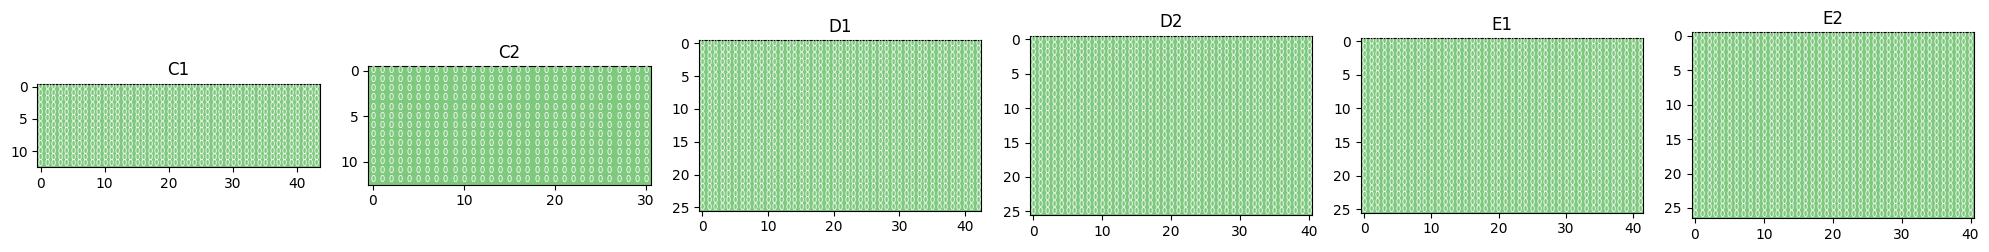

2024-02-11 00:00:00


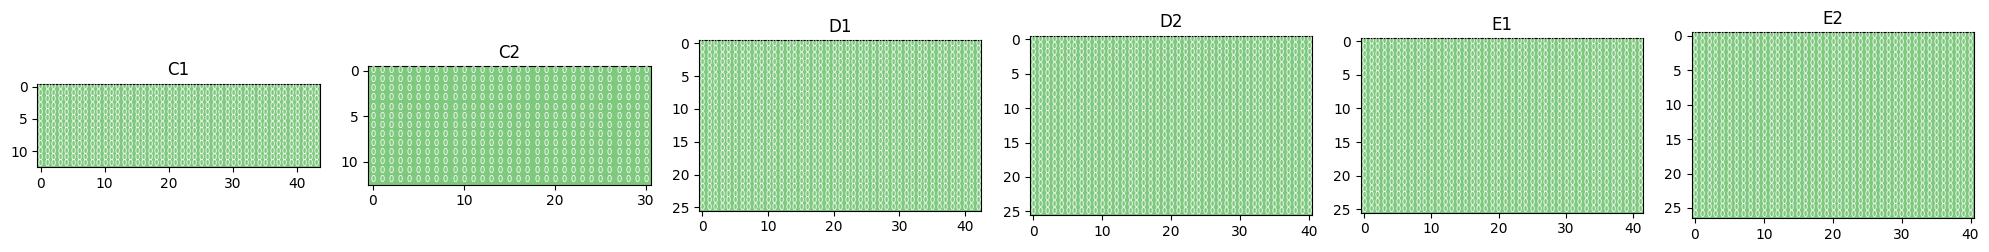

2024-02-21 00:00:00


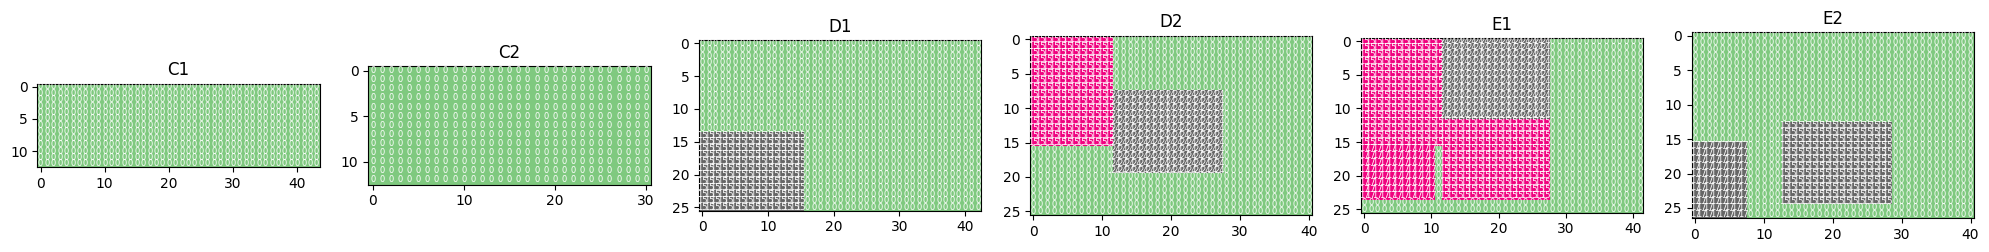

2024-03-02 00:00:00


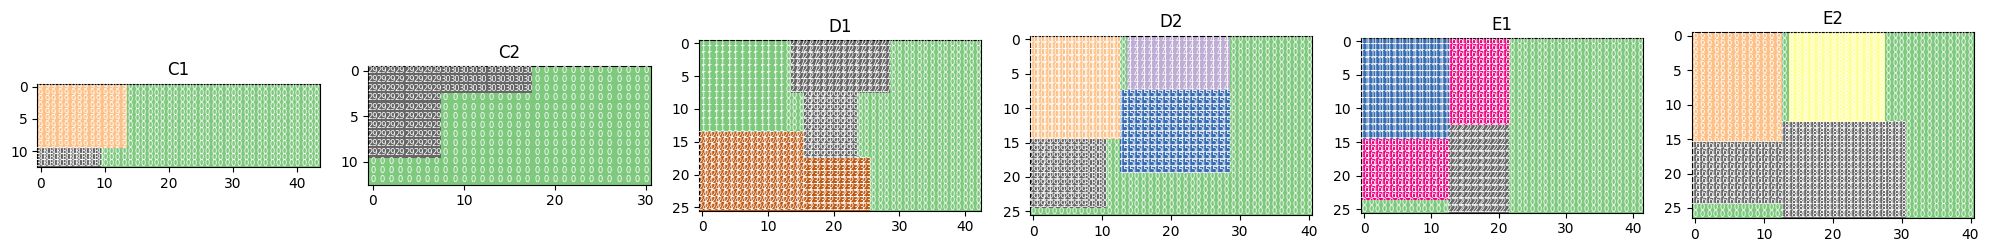

2024-03-12 00:00:00


In [ ]:
Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏ = Î†àÏù¥ÏïÑÏõÉÎã¨Î†•.columns
for idx in range(0,100):
    if idx % 10 == 0:
        draw_layout_6_subplots(Î†àÏù¥ÏïÑÏõÉÎã¨Î†•, Ï†ïÎ∞òÎ¶¨Ïä§Ìä∏, idx)
    else:
        pass